A traiter avant le PreProcessing

- Identifications des outliers (PEGI_goo, nb_joueur_JVC et max_joueur_JVC)


- Nan a traiter

- variables à supprimer car identiques et trop corrélées:
    - PEGI_goo
    - PEGI_wiki
    - classification_Age_JVC

    - developpeur_goo
    - developpeur_wiki

    - meta_VUsers
    - meta_VP

    - meta_NUsers
    - meta_NP

    - meta_score
    - user_review

- Support_JVC : peut-être ne garder que les 10 modalités les plus représsentées et le reste remplacer par autre

- Global_Sales target, donc supprimer NA_Sales, JP_Sales, EU_Sales et Other_Sales qui sont très corrélées

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [3]:
df= pd.read_csv("gaming_total_v2.csv", index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,avis_count_JVC,avis_note_JVC,Classification_Age_JVC,max_joueurs_JVC,Support_JVC,langue_parlée_JVC,texte_JVC,nb_joueurs_JVC,game_mode,game_mode_JVC
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,...,687.0,13.8,7.0,4.0,DVD,français,français,4.0,2.0,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,3.0,19.0,3.0,NaN,eShop Console Virtuelle Cartouche,NaN,NaN,NaN,NaN,1.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,...,3023.0,17.4,3.0,4.0,DVD,NaN,NaN,4.0,2.0,2.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,...,581.0,16.5,3.0,4.0,DVD,français,français,4.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_encode=pd.get_dummies(df)

#df_encode.to_csv('df_encode.csv')

In [5]:
df_le=df.copy()
#Encoder les modalités des variables à l'aide d'un LabelEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

col_a_sup=df_le.select_dtypes(include='object').columns

for col in df_le.select_dtypes(include='object').columns:
    df_le[f'{col}_encoded'] = le.fit_transform(df[col])

#df_le.drop('Unnamed: 0', axis=1)
df_le.drop(col_a_sup, axis=1)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PEGI_goo,PEGI_wiki,Meta_NP,Meta_VP,...,game_mode_JVC,Name_encoded,Platform_encoded,Genre_encoded,Publisher_encoded,developpeur_goo_encoded,developpeur_wiki_encoded,Support_JVC_encoded,langue_parlée_JVC_encoded,texte_JVC_encoded
0,2006.0,41.49,29.02,3.77,8.46,82.74,NaN,7.0,76.0,51.0,...,NaN,11007,26,10,359,319,566,194,1,1
1,1985.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,84.0,14.0,...,1.0,9327,11,4,359,527,977,511,3,3
2,2008.0,15.85,12.88,3.79,3.31,35.82,NaN,3.0,82.0,73.0,...,2.0,5573,26,6,359,527,566,194,3,3
3,2009.0,15.75,11.01,3.28,2.96,33.00,NaN,NaN,80.0,73.0,...,NaN,11009,26,10,359,319,977,194,1,1
4,1996.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,...,NaN,7346,5,7,359,527,977,531,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,2003.0,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,...,1.0,5796,7,8,241,527,396,237,1,1
16627,2008.0,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,...,NaN,8144,16,6,21,527,977,531,3,3
16628,2010.0,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,...,NaN,5014,4,5,8,527,977,531,3,3
16629,2003.0,0.01,0.00,0.00,0.00,0.01,NaN,3.0,NaN,NaN,...,NaN,8967,6,4,546,496,429,531,3,3


In [6]:
df_le.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,game_mode_JVC,Name_encoded,Platform_encoded,Genre_encoded,Publisher_encoded,developpeur_goo_encoded,developpeur_wiki_encoded,Support_JVC_encoded,langue_parlée_JVC_encoded,texte_JVC_encoded
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,...,NaN,11007,26,10,359,319,566,194,1,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,1.0,9327,11,4,359,527,977,511,3,3
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,...,2.0,5573,26,6,359,527,566,194,3,3
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,...,NaN,11009,26,10,359,319,977,194,1,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,NaN,7346,5,7,359,527,977,531,3,3


In [ ]:
#for col in df_le.select_dtypes(include=['float', 'int']).columns:
#    plt.figure()
#    sns.distplot(df_le[col], label=col)
    #sns.distplot(df['Global_Sales'], label= 'Global_Sales')
#    plt.legend()

C:\Users\debor\AppData\Local\Temp\ipykernel_10848\2141113220.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


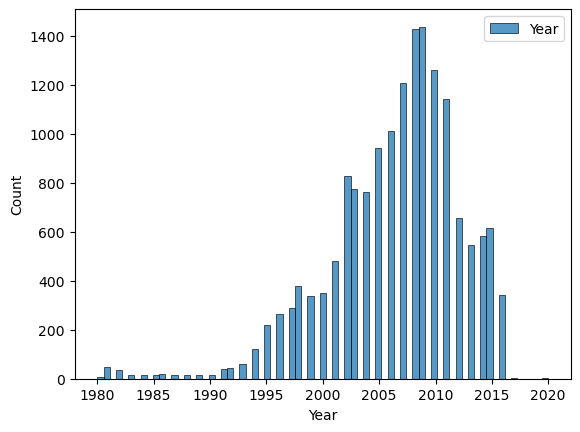

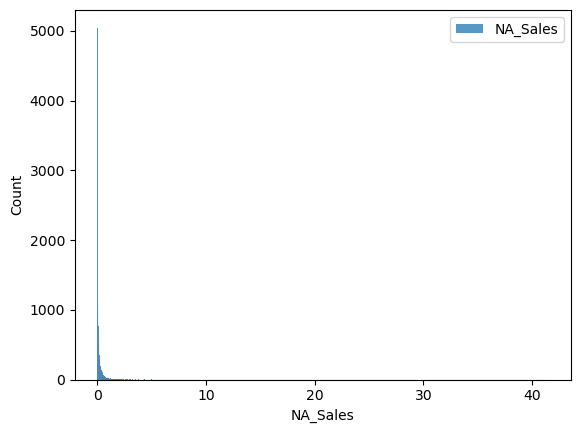

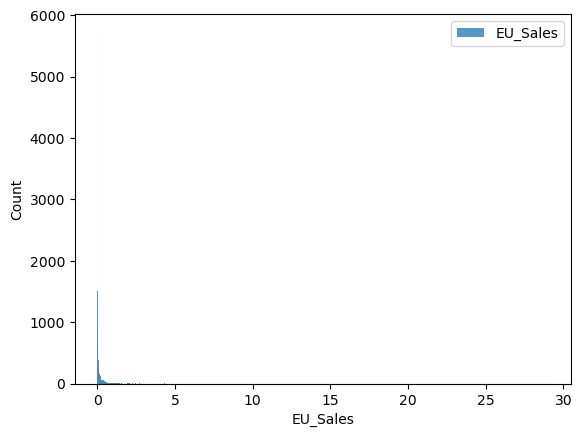

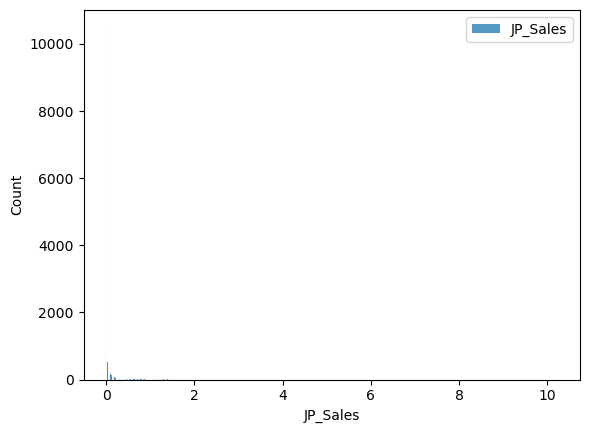

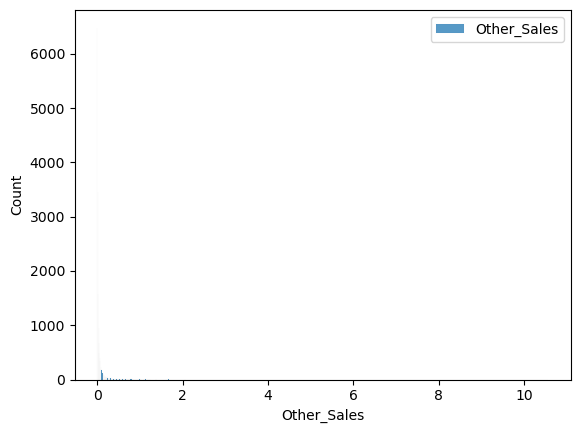

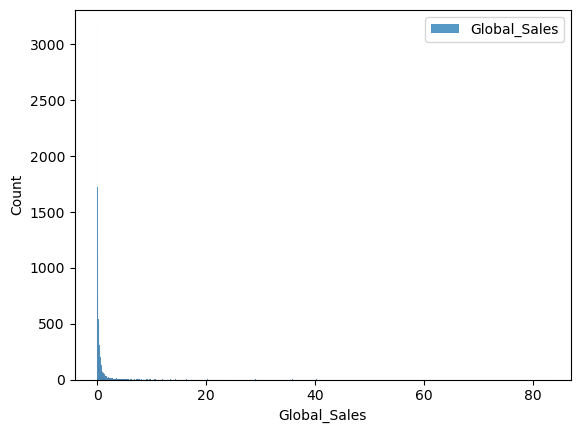

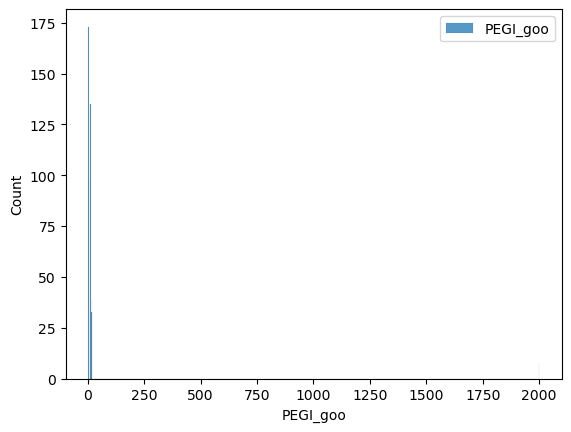

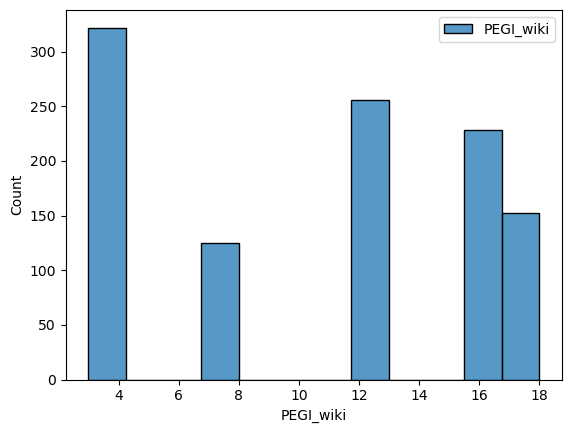

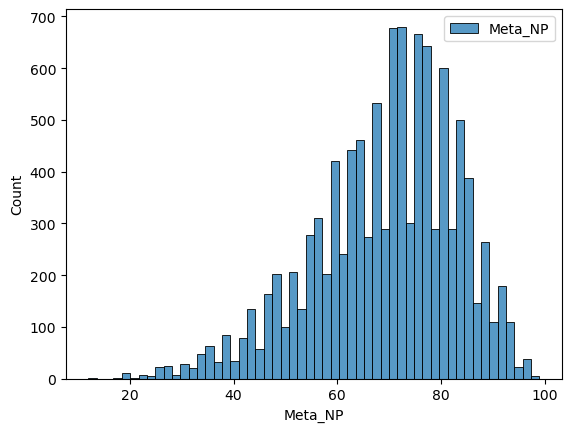

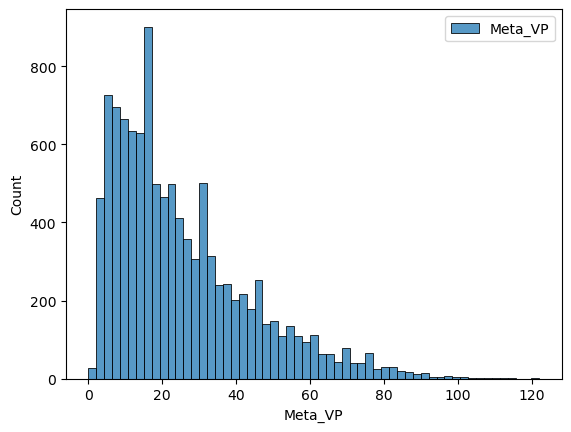

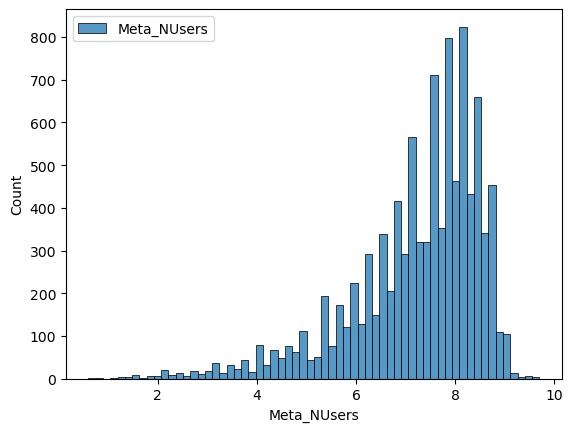

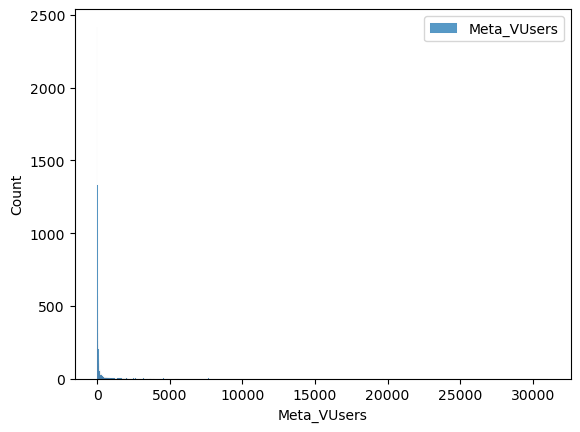

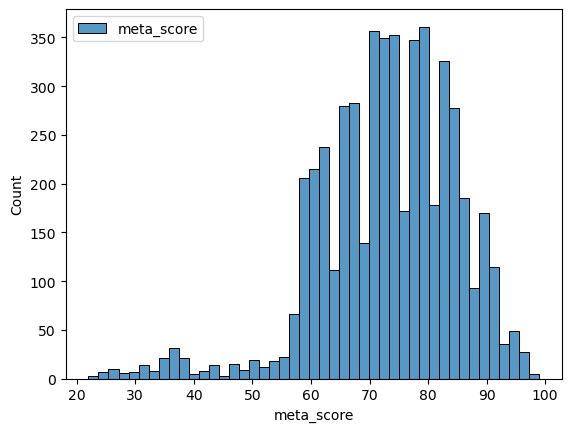

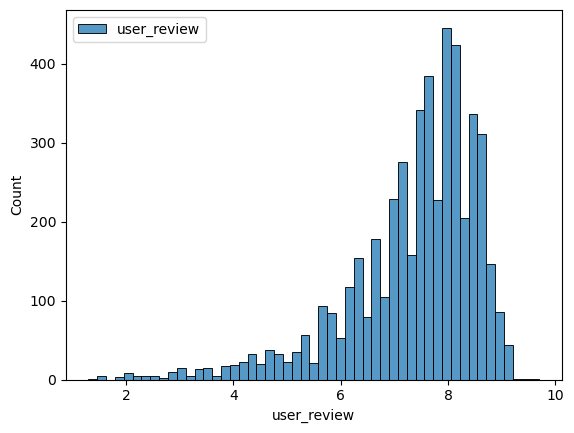

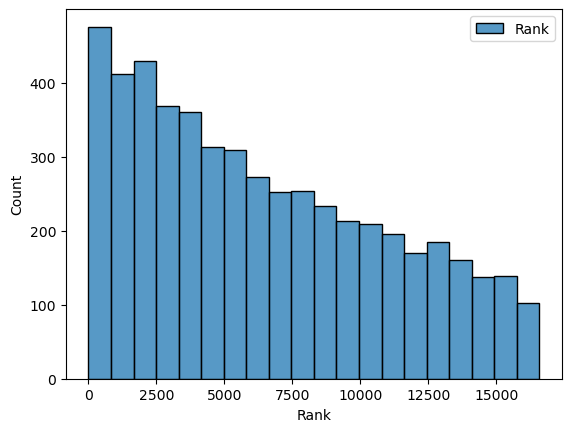

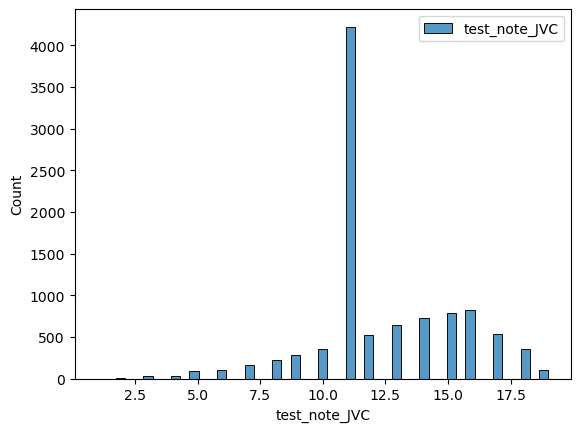

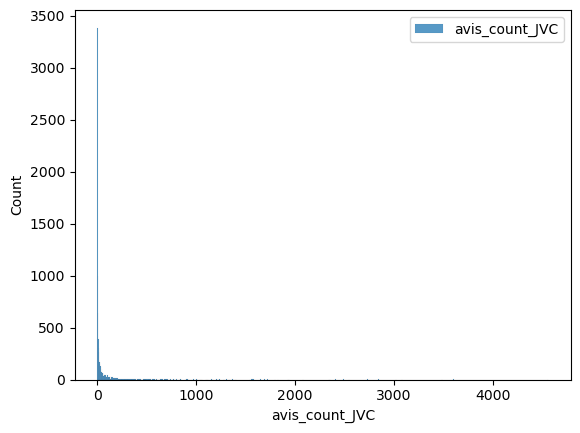

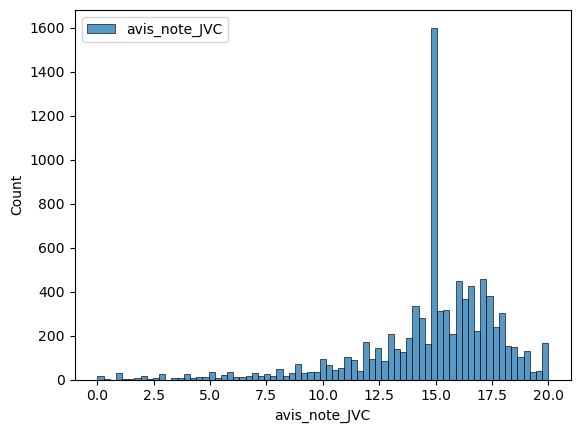

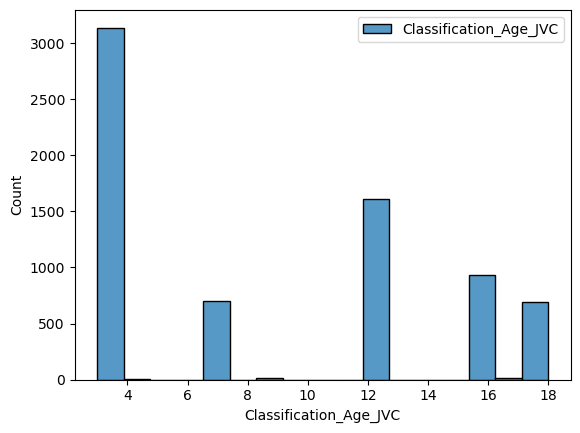

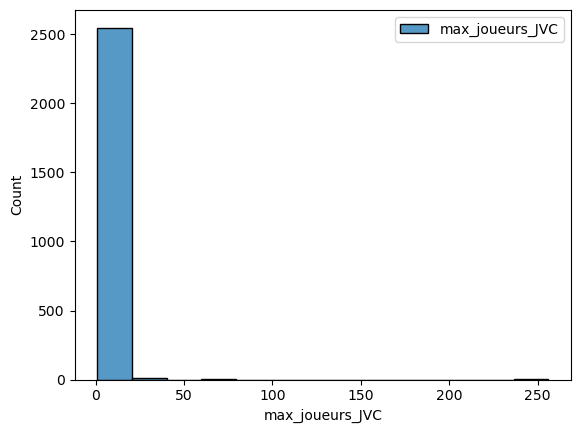

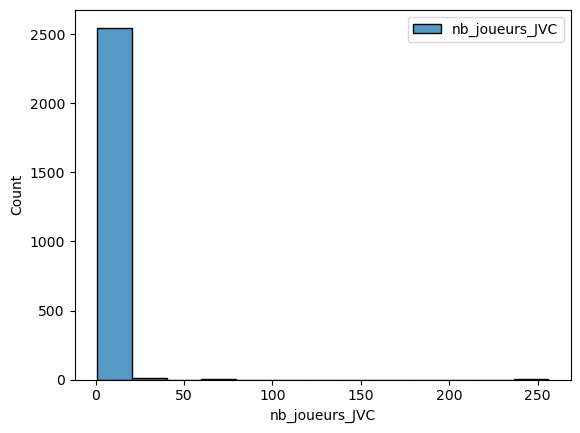

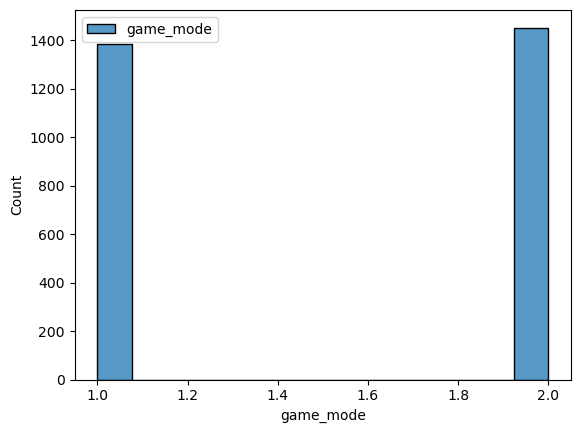

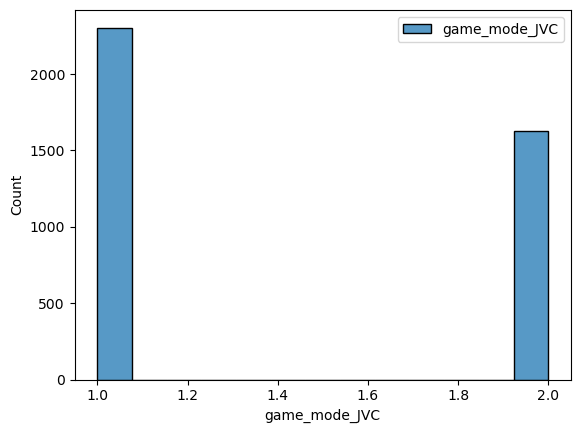

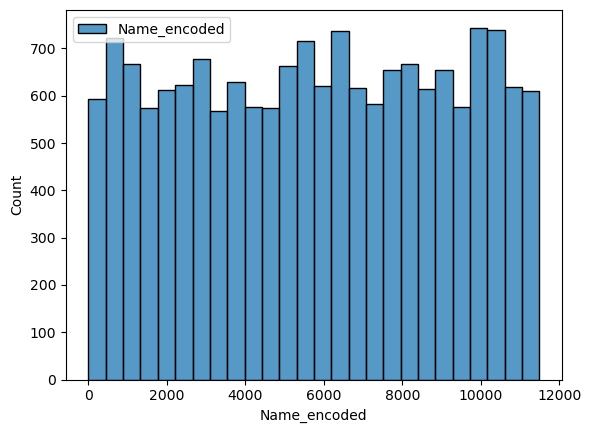

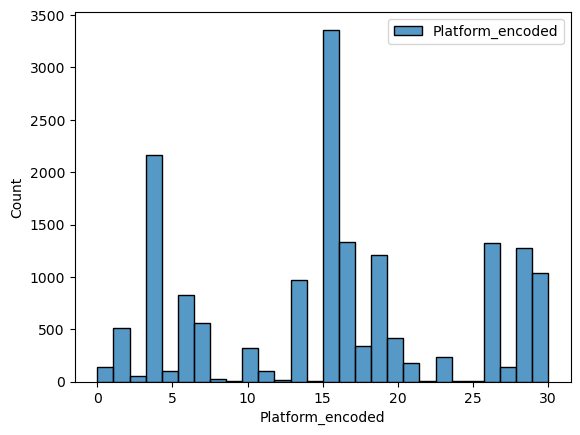

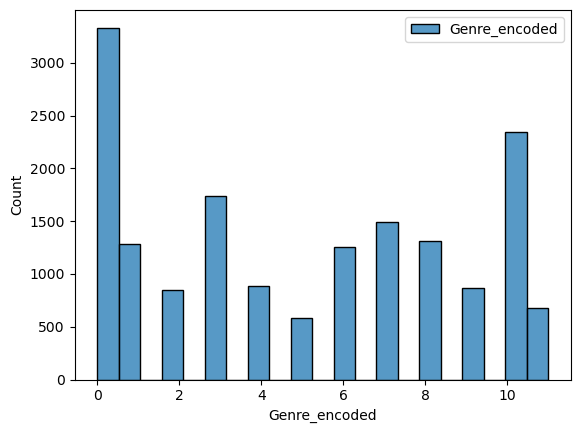

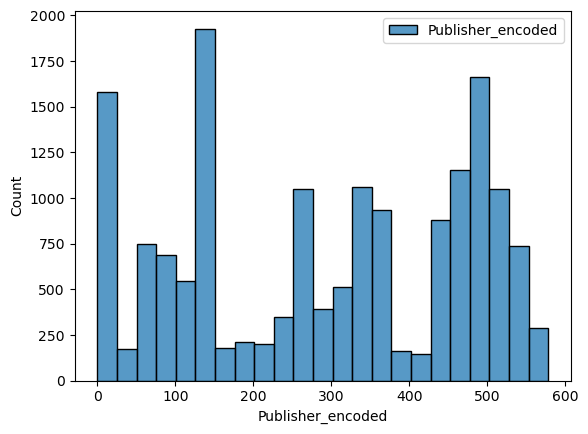

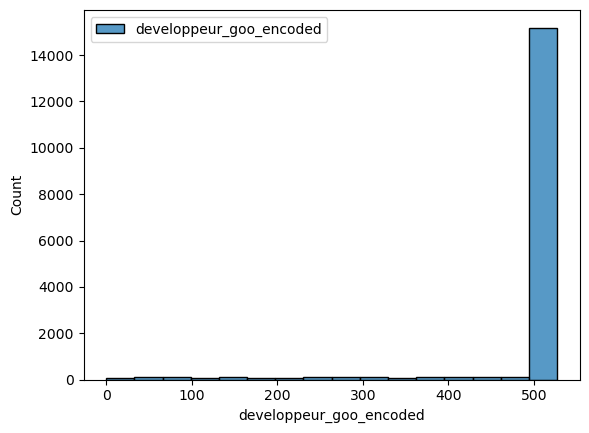

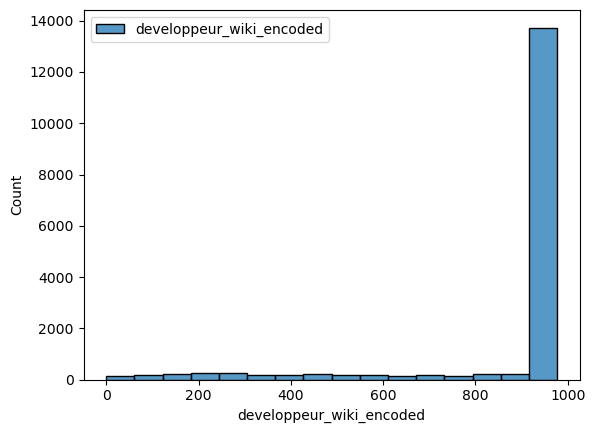

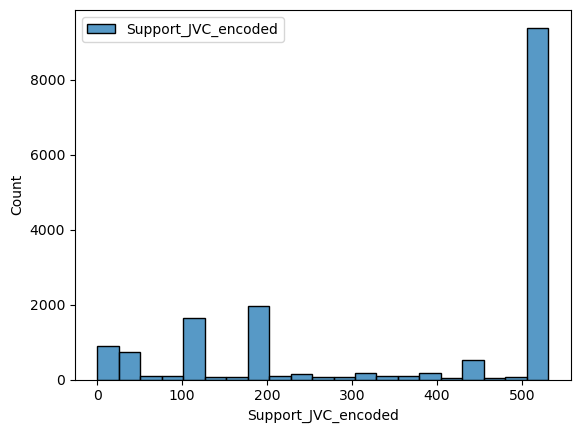

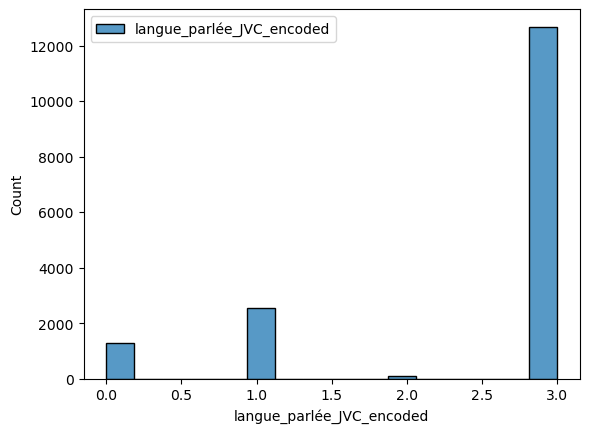

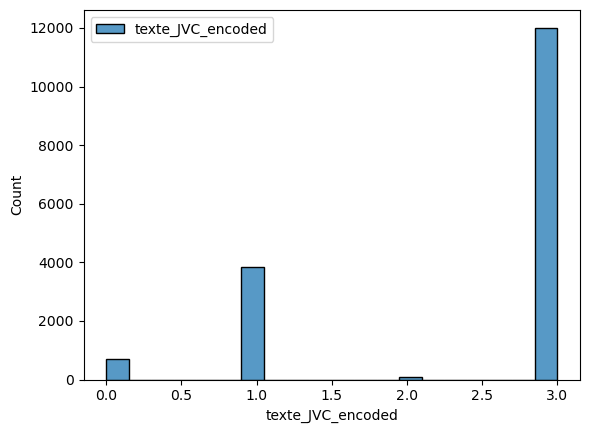

In [10]:
for col in df_le.select_dtypes(include=['float', 'int']).columns:
    plt.figure()
    sns.histplot(df_le[col], label=col)
    #sns.histplot(df_le['Global_Sales'])
    plt.legend()
    